In [21]:
import pandas as pd

df = pd.read_csv("../data/final_data_plus_features.csv")

df = df.dropna()

X, y = df[["Width", "Height", "Brightness", "stars", "rating", "reviews"] + list(df.columns[16:])], df["price"]
df

,name,city,Width,Height,Brightness,Color,Dominate,description,stars,price,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,Sheraton Centre Toronto Hotel,toronto,1024.0,683.0,155.256676,[160.03191629 154.12408206 149.43024942],[200.57826 200.7613 203.15504],"Located in the center of downtown Toronto, thi...",0.991736,6.146329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0093
1,Executive Hotel Cosmopolitan Toronto,toronto,1024.0,683.0,83.055545,[92.64822875 80.32992228 73.82429167],[19.295359 15.373721 14.762594],Executive Hotel Cosmopolitan Toronto is locate...,0.991736,5.786897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0165
2,Bisha Hotel Toronto,toronto,1024.0,698.0,124.711664,[125.08205643 124.53883865 125.15122028],[170.05089 169.21521 166.77252],Located in the heart of downtown Toronto's Ent...,2.234641,6.202536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0219
3,"Holiday Inn Toronto Downtown Centre, an IHG Hotel",toronto,1024.0,683.0,151.273481,[157.78680911 150.75462116 131.68814914],[183.58603 179.1546 161.714 ],This hotel is located next door to Maple Leaf ...,0.991736,5.652489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0408
4,Delta Hotels by Marriott Toronto,toronto,1024.0,683.0,130.871141,[142.68008356 127.70386421 118.32489791],[110.95356 77.24888 60.295742],"Located in the heart of downtown Toronto, the ...",0.991736,6.194405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Cambria Hotel Washington D.C. Capitol Riverfront,washington_dc,1024.0,683.0,137.776383,[152.10232888 134.04020349 120.76507452],[119.40983 90.022766 70.04221 ],"Located in Washington, D.C., a 4-minute walk f...",0.991736,6.549651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1498
2983,Glover Park Hotel Georgetown,washington_dc,1024.0,683.0,130.320680,[134.47323675 129.1918066 126.74156839],[174.98586 170.27669 169.48189],Glover Park Hotel Georgetown is 4 minutes' dri...,0.991736,5.283204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0795
2984,Residence Inn Washington Capitol Hill/Navy Yard,washington_dc,1024.0,683.0,134.167210,[138.87619103 132.93041242 129.61814976],[44.07484 38.75437 35.979973],"Featuring free WiFi and a fitness center, Resi...",-0.251169,6.129050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0021
2985,Washington Marriott Georgetown,washington_dc,1024.0,683.0,115.110339,[120.58370985 114.02776697 105.82554133],[95.89696 88.01665 77.69004],The Washington Marriott Georgetown is within 1...,0.991736,5.796058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0257


Training Score: 0.9341993047561146
Test Score: 0.8707249915179448


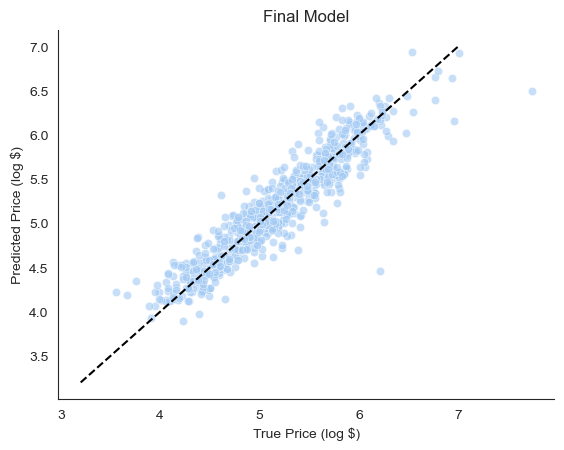

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# run linear regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = Ridge(alpha=10).fit(X_train, y_train)
predicted = reg.predict(X_test)
print("Training Score:", reg.score(X_train, y_train))
print("Test Score:", reg.score(X_test, y_test))

# plot the data
sns.set_style("white")
sns.set_palette("pastel")
sns.scatterplot(x=y_test, y=predicted, alpha=0.6)
x_range = np.linspace(3.2, 7, 10)
sns.lineplot(x=x_range, y=x_range, color='k', ls="--")
plt.xlabel("True Price (log $)")
plt.ylabel("Predicted Price (log $)")
plt.title("Final Model")
sns.despine()
plt.savefig("../figures/final_linear_regression_model.png", dpi=200)
plt.show()